In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

df.head()

array([0, 1])

In [3]:
df["HeartDisease"].unique()

array([0, 1])

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
numerical_column = df.select_dtypes(include=np.number).columns
categorical_column = df.select_dtypes(exclude=np.number).columns

numerical_column
df["HeartDisease"].unique()

array([0, 1])

In [7]:
categorical_column

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [8]:
numerical_column = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
df["HeartDisease"].unique()

array([0, 1])

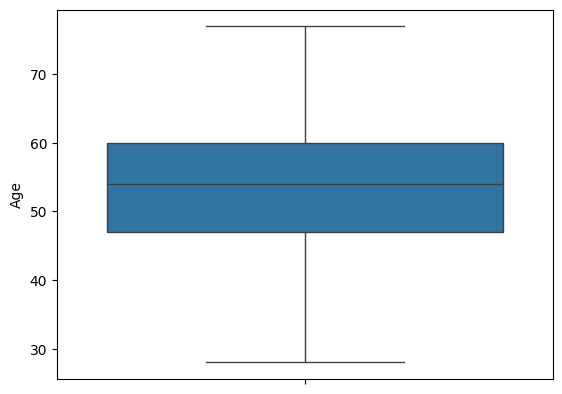

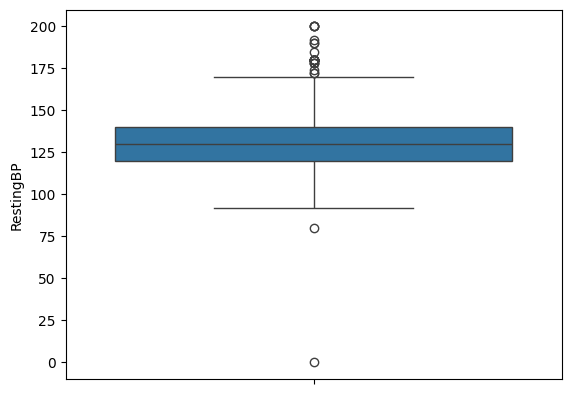

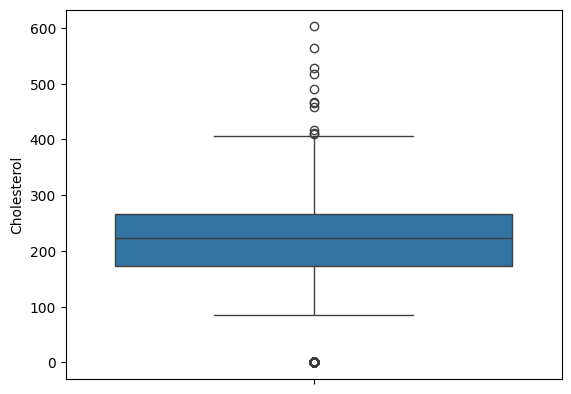

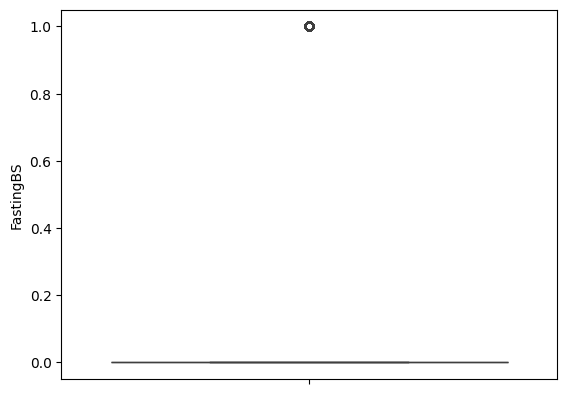

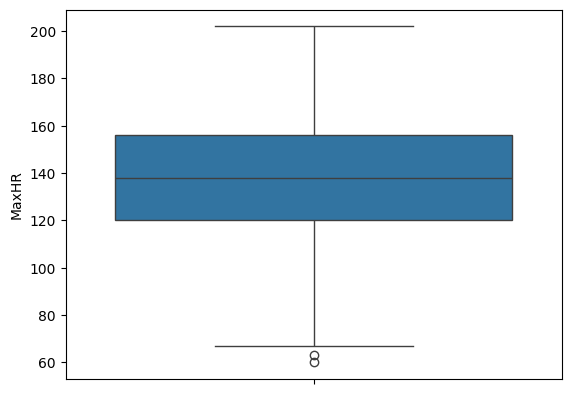

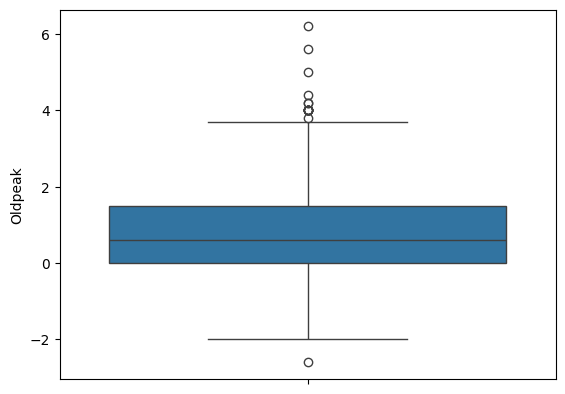

In [9]:
for column in numerical_column:
  sns.boxplot(df[column])
  plt.show()

In [10]:
df.dropna(inplace=True)

df.isnull().sum()
df["HeartDisease"].unique()

array([0, 1])

In [11]:
numerical_column

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

## Penanganan Outliers dengan cara mengganti nilai outliers dengan nilai bawah atau atas terdekat dengan tujuan untuk m

In [12]:
for column in numerical_column:        
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    df[column] = df[column].clip(lower=lower, upper=upper)

df["HeartDisease"].unique()

array([0, 1])

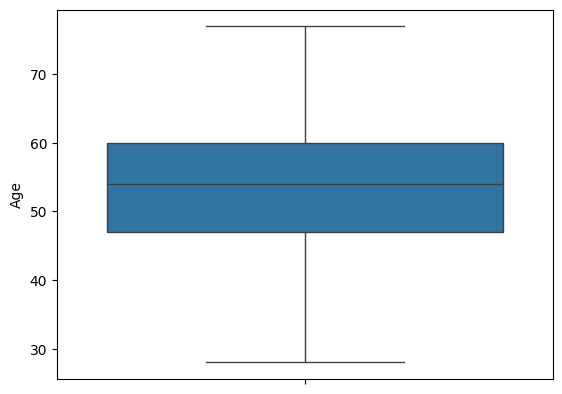

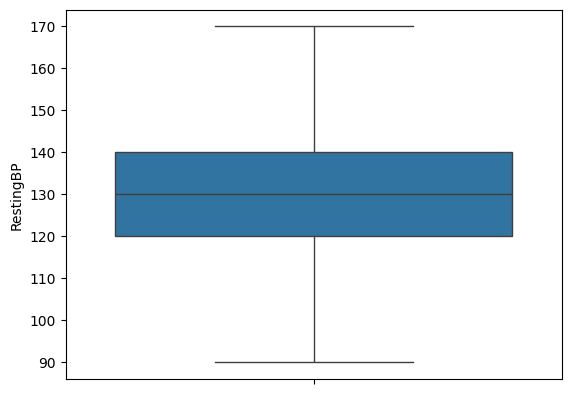

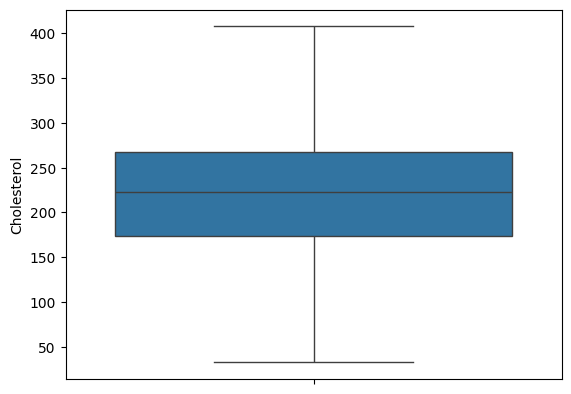

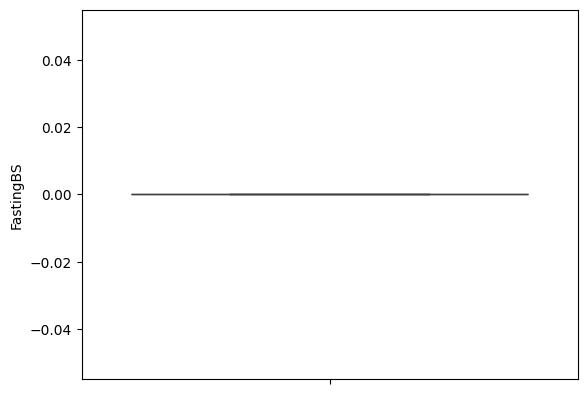

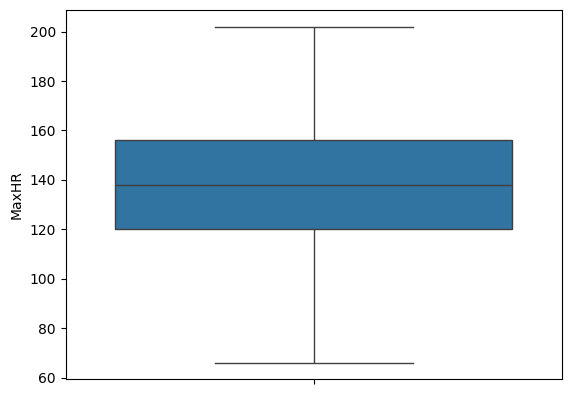

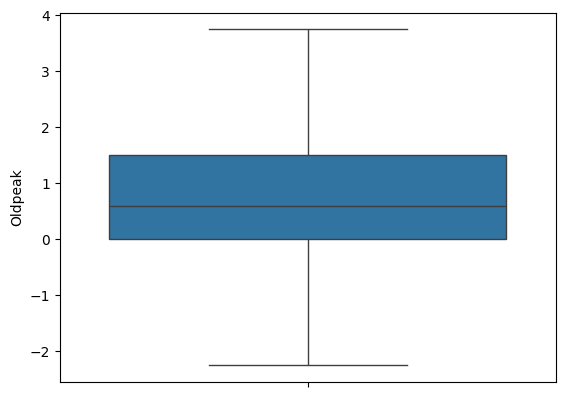

In [13]:
for column in numerical_column:
  sns.boxplot(df[column])
  plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [15]:
categorical_column

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [16]:
df[categorical_column].head(10)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
5,M,NAP,Normal,N,Up
6,F,ATA,Normal,N,Up
7,M,ATA,Normal,N,Up
8,M,ASY,Normal,Y,Flat
9,F,ATA,Normal,N,Up


In [17]:
from sklearn.preprocessing import LabelEncoder

df[categorical_column]=df[categorical_column].astype(str)
le = LabelEncoder()
for column in categorical_column:
    df[column] = le.fit_transform(df[column])

df[categorical_column]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


In [18]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X = df.drop(columns="HeartDisease")
y = df["HeartDisease"].astype(int)

y.unique()

array([0, 1])

In [20]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_scaled

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.85127647,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.11853217, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.85127647,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.3124939 , -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.85127647, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.85127647,  1.05211381]])

In [22]:
y.unique()

array([0, 1])

# CEK TIPE DARI NILAI DI KOLOM Y

In [23]:
from sklearn.utils.multiclass import type_of_target
print(type_of_target(y))

binary


## MEMILIH SELECTOR K-BEST

In [24]:
selector = SelectKBest(score_func=mutual_info_classif)
X_new = selector.fit_transform(X_scaled, y)

X_new

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.85127647,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.11853217, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.85127647,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.3124939 , -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.85127647, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.85127647,  1.05211381]])

# MEMBAGI DATA SET TESTING DAN TRAINING

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=68)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 10)
(184, 10)
(734,)
(184,)


# SVM DENGAN PIPELINE

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("feature_selection", SelectKBest(score_func=mutual_info_classif)),     
    ("model", SVC())
])

max_depth = [5, 10, 15, 20]
random_state = [42, 52, 68]

param_grid = [
    {
        'scaler': [StandardScaler()],
        'feature_selection': [SelectKBest(score_func=mutual_info_classif)],
        'feature_selection__k': [5, 10, 20],
        'model__kernel': ['linear', 'rbf'],
        'model__C': [0.1, 1, 10],
        'model__gamma': ['scale', 'auto']
    },
    {
        'scaler': [MinMaxScaler()],
        'feature_selection': [SelectPercentile(score_func=mutual_info_classif)],
        'feature_selection__percentile': [10, 20, 50],
        'model__kernel': ['linear', 'rbf'],
        'model__C': [0.1, 1, 10],
        'model__gamma': ['scale', 'auto']
    }
]

# Grid Search dengan CV 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=68)

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
    scoring="f1_macro"   
)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=68)
gs.fit(X_train, y_train)

/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=10. All the features will be returned.
  warnings.warn(
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=10. All the features will be returned.
  warnings.warn(
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=10. All the features will be returned.
  warnings.warn(
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=10. All the features will be returned.
  warnings.warn(
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=20 is greater than n_features=10. All the

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=68, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7f34db9504a0>)),
                                       ('model', SVC())]),
             n_jobs=-1,
             param_grid=[{'feature_selection': [SelectKBest(score_func=<function mutual_info_classif at 0x7f34db9504a0>)...
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf'],
                          'scaler': [StandardScaler()]},
                         {'feature_selection': [SelectPercentile(score_func=<function mutual_info_classif at 0x7f34db9504a0>)],
                          'feature_selection__percentile': [10, 20, 50],
                          'model__C': [0.1, 1, 10],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf'],
                          'scaler': [MinMaxScaler()]}],
             scoring='f1_macro')

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Best parameters:", gs.best_params_)
print("Best CV accuracy:", gs.best_score_)

best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'feature_selection': SelectKBest(score_func=<function mutual_info_classif at 0x7f34db9504a0>), 'feature_selection__k': 10, 'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf', 'scaler': StandardScaler()}
Best CV accuracy: 0.8736905958188735
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       129
           1       0.78      0.93      0.85       147

    accuracy                           0.82       276
   macro avg       0.84      0.81      0.82       276
weighted avg       0.84      0.82      0.82       276



In [28]:
import pickle
with open('modelSVM.pkl', 'wb') as file:
    pickle.dump(pipe, file)

CV Score (F1) terbaik: 0.8736905958188735
Kombinasi model terbaik: Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x7f34db9504a0>)),
                ('model', SVC(C=1))])

Skor Test (akurasi) Support Vector Machine: 0.822463768115942

Fitur terbaik (terpilih): ['Age' 'Sex' 'ChestPainType' 'RestingBP' 'Cholesterol' 'FastingBS'
 'RestingECG' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope']


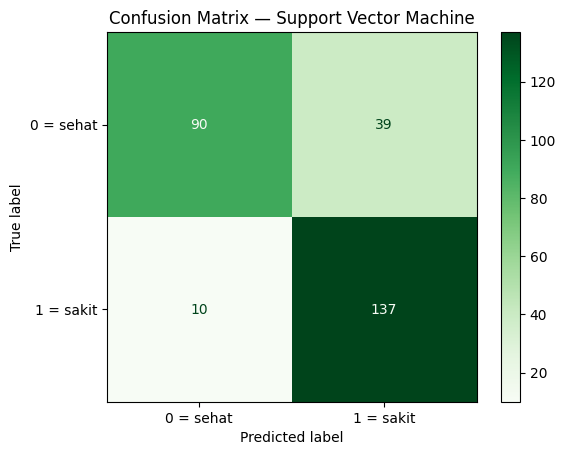


Classification Report — Support Vector Machine:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       129
           1       0.78      0.93      0.85       147

    accuracy                           0.82       276
   macro avg       0.84      0.81      0.82       276
weighted avg       0.84      0.82      0.82       276



In [29]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

print("CV Score (F1) terbaik:", gs.best_score_)        
print("Kombinasi model terbaik:", gs.best_estimator_)     

lr_test_score = gs.best_estimator_.score(X_test,y_test)
print("\nSkor Test (akurasi) Support Vector Machine:", lr_test_score)

selector = gs.best_estimator_.named_steps['feature_selection']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)  
    print("\nFitur terbaik (terpilih):", selected)

#  Confusion Matrix & Classification Report
lr_pred = gs.predict(X_test)              
cm_lr = confusion_matrix(y_test, lr_pred)  
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['0 = sehat','1 = sakit'])
disp_lr.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix — Support Vector Machine")
plt.show()

best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report — Support Vector Machine:\n", classification_report(y_test, lr_pred))

In [ ]:
# ==== Gradient Boosting  ====
import time
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectPercentile, f_classif, mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(int), test_size=0.3, random_state=68, stratify=y
)

num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

num_pipe = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scale", "passthrough"), 
])

cat_pipe = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary", min_frequency=0.02)),
])

preproc = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ],
    remainder="drop"
)

pipe = Pipeline(steps=[
    ("prep", preproc),
    ("vt", VarianceThreshold(threshold=0.0)),
    ("selector", SelectKBest(score_func=mutual_info_classif, k="all")),  
    ("clf", GradientBoostingClassifier(random_state=42)),
])

is_binary = (np.unique(y_train).size == 2)
scoring = "roc_auc" if is_binary else "roc_auc_ovr"
n_splits = max(3, min(5, np.bincount(y_train).min()))
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

p = X_train.shape[1]
k_opts = ["all"] + [k for k in [5, 10, 15, 20, 30] if k <= p]
percentile_opts = [10, 20, 30, 50, 80, 100]

param_grid = [
    {
        "prep__num__scale": ["passthrough", StandardScaler(), MinMaxScaler()],
        "selector": [SelectKBest(score_func=f_classif), SelectKBest(score_func=mutual_info_classif)],
        "selector__k": k_opts,
        "clf__n_estimators": [200, 400],
        "clf__learning_rate": [0.05, 0.1],
        "clf__max_depth": [2, 3],
        "clf__subsample": [0.8, 1.0],
        "clf__max_features": ["sqrt", None],
    },
    {
        "prep__num__scale": ["passthrough", StandardScaler(), MinMaxScaler()],
        "selector": [SelectPercentile(score_func=f_classif), SelectPercentile(score_func=mutual_info_classif)],
        "selector__percentile": percentile_opts,
        "clf__n_estimators": [200, 400],
        "clf__learning_rate": [0.05, 0.1],
        "clf__max_depth": [2, 3],
        "clf__subsample": [0.8, 1.0],
        "clf__max_features": ["sqrt", None],
    },
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    error_score=np.nan  
)

start = time.time()
gs.fit(X_train, y_train)
print("Best CV score :", gs.best_score_)
print("Best params   :", gs.best_params_)

best_pipe = gs.best_estimator_
y_pred  = best_pipe.predict(X_test)
proba   = best_pipe.predict_proba(X_test)
auc = roc_auc_score(y_test, proba[:, 1]) if is_binary else roc_auc_score(y_test, proba, multi_class="ovr", average="macro")
acc = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy : {acc:.4f}")
print(f"Test ROC AUC  : {auc:.4f}\n")
print("Classification report:\n", classification_report(y_test, y_pred, zero_division=0))
print(f"Training selesai dalam {time.time() - start:.2f} detik")


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


In [31]:
import pickle

filename = "gradientBest.pkl"
with open(filename, "wb") as f:
    pickle.dump(best_pipe, f)

print(f"Model disimpan ke: {filename}")

Model disimpan ke: gradient_boosting_best_model.pkl


In [32]:
y.unique()

array([0, 1])

CV Score (F1) terbaik: 0.9202156229798506
Kombinasi model terbaik: Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Sex',
                                                   'ChestPainType', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'RestingECG', 'MaxHR',
                                                   'ExerciseAngina', 'Oldpeak',
                                                   'ST_Slope']),
                                                 ('cat',
         

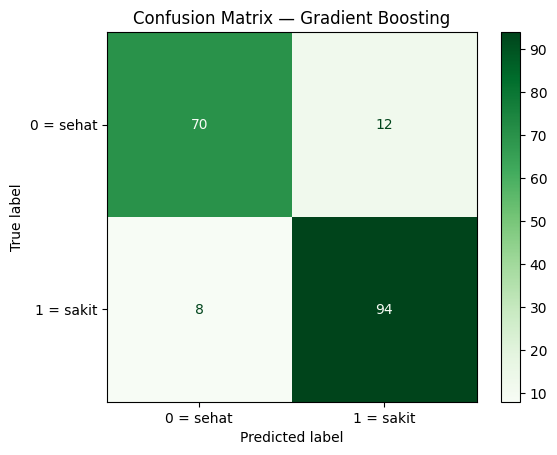


Classification Report — Gradient Boosting:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        82
           1       0.89      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [33]:
print("CV Score (F1) terbaik:", gs.best_score_)        
print("Kombinasi model terbaik:", gs.best_estimator_)     

lr_test_score = gs.best_estimator_.score(X_test,y_test)
print("\nSkor Test (akurasi) Gradient Boosting:", lr_test_score)

selector = gs.best_estimator_.named_steps['selector']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)  
    print("\nFitur terbaik (terpilih):", selected)

lr_pred = gs.predict(X_test)              
cm_lr = confusion_matrix(y_test, lr_pred)  
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['0 = sehat','1 = sakit'])
disp_lr.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix — Gradient Boosting")
plt.show()

best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
print("\nClassification Report — Gradient Boosting:\n", classification_report(y_test, lr_pred))

# MODEL TERBAIK ADALAH GRADIENT BOOSTING DENGAN AKURASI 89%